# Import libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Read dataset and handle missing values

In [4]:
df_1=pd.read_csv("flavors_of_cacao.csv")
print(df_1.head())
## replace \n in columns name with ''
df_1.columns= df_1.columns.str.replace('\n','',regex=True)
## replace latin space (u'\xa0') with a space (u' ') 
df_1.columns= df_1.columns.str.replace(u'\xa0', u' ',regex=True)
##replace all latin space in the dataset with a space
df_1=df_1.replace(u'\xa0', u' ',regex=True)
print("new names:",df_1.columns) 
##count number of missing in the dataset
print("number of missing at each attribute:")
print(df_1.isnull().sum())
## number of rows before removing the missing entries
print("number of rows before removing missing entries:", df_1.shape[0])
## remove missing entries 
df=df_1.dropna()
## number of rows after removing the missing entries
print("number of rows after removing missing entries:", df.shape[0])

  Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                   A. Morin                       Agua Grande  1876   
1                   A. Morin                             Kpime  1676   
2                   A. Morin                            Atsane  1676   
3                   A. Morin                             Akata  1680   
4                   A. Morin                            Quilla  1704   

   Review\nDate Cocoa\nPercent Company\nLocation  Rating Bean\nType  \
0          2016            63%            France    3.75              
1          2015            70%            France    2.75              
2          2015            70%            France    3.00              
3          2015            70%            France    3.50              
4          2015            70%            France    3.50              

  Broad Bean\nOrigin  
0           Sao Tome  
1               Togo  
2               Togo  
3               Togo  
4               Peru  
ne

# Exploring Dataset

In [5]:
# count number of tuples
print("number of tuples=",df.shape[0])
# get number of unique company names
print("number of unique company names: ",df["Company (Maker-if known)"].nunique())
# number of reviews in 2013
reviews_2013=np.sum(df["ReviewDate"]==2013)
print("number of reviews in 2013=",reviews_2013)
# get number of missing in the beanType.
print("number of missing in the beanType attribute=",np.sum(df["BeanType"]==' '))


number of tuples= 1793
number of unique company names:  416
number of reviews in 2013= 184
number of missing in the beanType attribute= 887


# Visualizaion

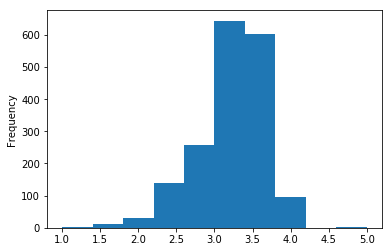

In [6]:
# draw histogram for Rating
df["Rating"].plot.hist()

# comment
##### The rating between 3 and 3.5 is the highest frequency among the rating data.

# Convert and Visualize

Company (Maker-if known)            object
Specific Bean Originor Bar Name     object
REF                                  int64
ReviewDate                           int64
CocoaPercent                       float64
CompanyLocation                     object
Rating                             float64
BeanType                            object
Broad BeanOrigin                    object
dtype: object


C:\Users\ME-LT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ME-LT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


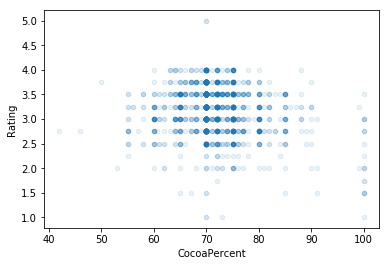

In [7]:
## convert type of CocoaPercent from string to integer
df['CocoaPercent']=df['CocoaPercent'].replace("%","",regex=True)
# print("column=", df['CocoaPercent'])
df['CocoaPercent']=df['CocoaPercent'].astype("float64")
print(df.dtypes)
##plot scatter
df.plot.scatter(x ='CocoaPercent', y = "Rating", alpha=0.1)

# comment 
From scatter plot, when the numnber of cocoa increases, the rating doesn't increase with it. 

# Normalization 

In [8]:
# normalize rating dataset
scaler = StandardScaler()
df["Rating"]= scaler.fit_transform(df[["Rating"]])
print("rating normalized=",df["Rating"])

rating normalized= 0       1.181356
1      -0.912734
2      -0.389211
3       0.657834
4       0.657834
          ...   
1790    1.181356
1791   -0.389211
1792    0.657834
1793    0.134311
1794   -0.389211
Name: Rating, Length: 1793, dtype: float64


C:\Users\ME-LT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# challenge yourself 

In [9]:
## oder dataframe based on rating in ascending order
df=df.sort_values(by=['Rating'])
print("companies ordered by their average score=",df["Company (Maker-if known)"])

companies ordered by their average score= 465      Cote d' Or (Kraft)
326               Callebaut
1175    Neuhaus (Callebaut)
437         Claudio Corallo
1694               Valrhona
               ...         
76                   Amedei
77                   Amedei
1528                   Soma
86                   Amedei
78                   Amedei
Name: Company (Maker-if known), Length: 1793, dtype: object


# Encoding

In [10]:
## company Name and location encoder by label encoder
encoder = LabelEncoder()
# df["Company (Maker-if known)"].nunique()
# df["CompanyLocation"].nunique()
company_name_encoder= encoder.fit_transform(df["Company (Maker-if known)"])
company_location_encoder= encoder.fit_transform(df["CompanyLocation"])
print("company name encoder=", company_name_encoder)
print("company_location_encoder=", company_location_encoder)

company name encoder= [106  64 277 ... 353  14  14]
company_location_encoder= [ 4  4  4 ...  7 29 29]
